# Домашнее задание
* Прочитать про методы оптимизации для нейронных сетей https://habr.com/post/318970/
* Реализовать самостоятельно логистическую регрессию
    * Обучить ее методом градиентного спуска
    * Методом nesterov momentum
    * Методом rmsprop
* В качестве dataset'а взять Iris, оставив 2 класса:
    * Iris Versicolor
    * Iris Virginica

In [175]:
from sklearn import datasets
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
from jupyterthemes import jtplot
jtplot.style()

In [97]:
iris = datasets.load_iris()

In [8]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [9]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [69]:
# Выкашиваем лишние цвяточки, попутно перекласифицируем, чтобы по классике искать между 0 и 1, а не между 1 и 2
X = []
Y = []
for idx, item in enumerate(iris.target):
    if item != 0:
        X.append(iris.data[idx])
        Y.append(item-1)

X = np.asarray(X)
Y = np.asarray(Y)
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [35]:
X.shape

(100, 4)

In [73]:
# Классифицирующая функция, пропущенная через сигмоиду
def predict(theta, X):
    predict = theta[0] + theta[1] * X[:, 0] + theta[2] * X[:, 1] + theta[3] * X[:, 2] + theta[4] * X[:, 3]
    sigm = 1. / (1 + np.exp(-predict))
    return sigm

## Простой градиент

In [172]:
# Простой градиент
# Количество эпох и лернинг рейт требуют настройки, случайные начальные занчения могут сильно влиять на результат
# Может повезти и ошибок будет 5-6, а может и не повезти и ошибок будет большинство
lr = 0.05
theta = []
#theta = np.random.normal(size=(5,))
theta = [-0.66556365, -1.46787087, -0.21254648, -0.14877584,  2.22796437]
print(theta)
grad_loss_hist = []
for _ in range(50):
    sigm = predict(theta, X)
    theta[0] -= lr * np.sum(sigm - Y)/len(sigm)
    theta[1] -= lr * np.sum((sigm - Y) * X[:, 0])/len(sigm)
    theta[2] -= lr * np.sum((sigm - Y) * X[:, 1])/len(sigm)
    theta[3] -= lr * np.sum((sigm - Y) * X[:, 2])/len(sigm)
    theta[4] -= lr * np.sum((sigm - Y) * X[:, 3])/len(sigm)
    loss = - np.mean(np.log(sigm) * Y + np.log(1 - sigm) * (1 - Y))
    print(theta)
    grad_loss_hist.append(loss)


[-0.66556365, -1.46787087, -0.21254648, -0.14877584, 2.22796437]
[-0.6406057403179901, -1.303421937843693, -0.13831619591105637, -0.01018059072036226, 2.2785378228425044]
[-0.6159155739594111, -1.1406071676700416, -0.06486335127016309, 0.1270669617776886, 2.328601092851893]
[-0.5931042678918174, -0.9894879279355133, 0.0030538872844340786, 0.2546260534021556, 2.374992070424903]
[-0.5785549773869387, -0.8907476248744525, 0.04654776418366293, 0.3391431596429527, 2.4054763069748857]
[-0.5750077270803925, -0.8622515140133977, 0.05784074431301905, 0.36704547738188426, 2.4160235243413286]
[-0.575211804118447, -0.8576193070467582, 0.058261523447176784, 0.37603550629107524, 2.420129525524356]
[-0.5762360889507209, -0.8581974542745464, 0.0563126135215557, 0.38091315394991704, 2.422846883828909]
[-0.5774434253046535, -0.8599442516212177, 0.05383452737137504, 0.3848611422658401, 2.4252495158659917]
[-0.5786911400581409, -0.861955409926495, 0.05123900008332694, 0.3885903533888865, 2.427576682023114

In [173]:
grad_loss_hist

[3.6409214614271534,
 2.5457892818334145,
 1.4957100799283896,
 0.6950316057571198,
 0.42846166556362875,
 0.4057504315257441,
 0.4040406266299081,
 0.403348459975539,
 0.40271071328494484,
 0.4020782152314406,
 0.4014483619568564,
 0.40082100184525177,
 0.4001961140921525,
 0.3995736849941099,
 0.39895370130947216,
 0.3983361498996764,
 0.3977210177093287,
 0.397108291764639,
 0.39649795917285346,
 0.3958900071217424,
 0.39528442287909377,
 0.3946811937922075,
 0.3940803072873937,
 0.39348175086947196,
 0.3928855121212741,
 0.3922915787031481,
 0.39169993835246614,
 0.39111057888313205,
 0.3905234881850951,
 0.3899386542238626,
 0.38935606504001646,
 0.3887757087487328,
 0.3881975735393028,
 0.3876216476746558,
 0.38704791949088685,
 0.38647637739678375,
 0.3859070098733584,
 0.3853398054733813,
 0.38477475282091544,
 0.38421184061085645,
 0.383651057608472,
 0.383092392648946,
 0.3825358346369231,
 0.3819813725460575,
 0.38142899541856373,
 0.3808786923647689,
 0.38033045256266823,
 

In [153]:
# Смотрим, сколько допостили ошибок при классификации
err = 0
for idx, item in enumerate(np.around(predict(theta, X))):
    if item != Y[idx]:
        err += 1
err

7

In [147]:
# Сравниваем результаты классификации
np.matrix([np.around(predict(theta, X)), Y]).T

matrix([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [1., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [1., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [1., 0.],
        [1., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1

## nesterov momentum

In [162]:
# nesterov momentum
lr = 0.05
theta = []
#theta = np.random.normal(size=(5,))
theta = [-0.66556365, -1.46787087, -0.21254648, -0.14877584,  2.22796437]
vel_pred = np.zeros(5)
vel = np.zeros(5)
print(theta)
nest_loss_hist = []
gamma = 0.975
for _ in range(50):
    sigm = predict(theta, X)
    loss = - np.mean(np.log(sigm) * Y + np.log(1 - sigm) * (1 - Y))
    nest_loss_hist.append(loss)
    
    sigm = predict(theta - gamma * vel_pred, X)
    
    vel[0] = (gamma * vel_pred[0] + lr * np.sum(sigm - Y))/len(sigm)
    vel[1] = (gamma * vel_pred[1] + lr * np.sum((sigm - Y) * X[:, 0]))/len(sigm)
    vel[2] = (gamma * vel_pred[2] + lr * np.sum((sigm - Y) * X[:, 1]))/len(sigm)
    vel[3] = (gamma * vel_pred[3] + lr * np.sum((sigm - Y) * X[:, 2]))/len(sigm)
    vel[4] = (gamma * vel_pred[4] + lr * np.sum((sigm - Y) * X[:, 3]))/len(sigm)
    theta -= vel
    print(theta)

    vel_pred = vel

[-0.66556365, -1.46787087, -0.21254648, -0.14877584, 2.22796437]
[-0.64060574 -1.30342194 -0.1383162  -0.01018059  2.27853782]
[-0.61748925 -1.15031162 -0.06949233  0.11905085  2.32554315]
[-0.60170039 -1.04361228 -0.0223377   0.21010413  2.35839863]
[-0.59215367 -0.976766    0.00646909  0.26879647  2.37966682]
[-0.58609841 -0.93222441  0.02507237  0.30955238  2.39465883]
[-0.58307367 -0.90701291  0.03485695  0.33487719  2.40433023]
[-0.58110764 -0.88854865  0.04156872  0.35483508  2.41216599]
[-0.58086399 -0.88103969  0.04329231  0.36611758  2.41705358]
[-0.58050419 -0.87280193  0.04535081  0.37796395  2.42212999]
[-0.5814885  -0.87310054  0.04352475  0.38307403  2.42493032]
[-0.58169139 -0.86845176  0.04395459  0.39206758  2.42903823]
[-0.58328753 -0.8726441   0.04036152  0.39409637  2.43079873]
[-0.58359773 -0.86869327  0.04047942  0.40251788  2.43470969]
[-0.5855823  -0.87536182  0.03576477  0.40258209  2.4358073 ]
[-0.5857782  -0.8707027   0.03621111  0.41153986  2.43989558]
[-0.5

In [163]:
nest_loss_hist

[3.6409214614271534,
 2.5457892818334145,
 1.5556278274797453,
 0.9422777297636452,
 0.6420694899477054,
 0.500901602522372,
 0.4460180731379241,
 0.4191186017906219,
 0.4105742555113024,
 0.40454462759607407,
 0.40329600197681337,
 0.40123694807000665,
 0.40090282174842673,
 0.3997696568335648,
 0.3994257863978391,
 0.39860050222575,
 0.3981760321264581,
 0.39750458857609056,
 0.3970378796631824,
 0.3964800411711137,
 0.3960088479995993,
 0.39557151383314476,
 0.3951209619691899,
 0.3948480266784981,
 0.3944266945243068,
 0.3944051727825464,
 0.3939918392053947,
 0.3943652254235456,
 0.39387949586307724,
 0.3948615451490454,
 0.39411708480675484,
 0.39599411286148417,
 0.39464966612682645,
 0.39775551537013093,
 0.39530774627775783,
 0.39996323504039166,
 0.3958364778053483,
 0.402267384718698,
 0.3959979510872948,
 0.40426557019734893,
 0.3956767551748609,
 0.4056540568664965,
 0.3949022524227391,
 0.40630735977167554,
 0.3937887133481244,
 0.4062576529970457,
 0.3924621081743202,
 0

In [164]:
# Смотрим, сколько допостили ошибок при классификации
err = 0
for idx, item in enumerate(np.around(predict(theta, X))):
    if item != Y[idx]:
        err += 1
err

9

Судя по всему, проскакиваем минимум туда-сюда

## RMSProp

In [166]:
# RMSProp
lr = 0.05
theta = []
#theta = np.random.normal(size=(5,))
theta = [-0.66556365, -1.46787087, -0.21254648, -0.14877584,  2.22796437]
e_sq_grad = np.zeros(5)
grad = np.zeros(5)
print(theta)
rmsp_loss_hist = []
gamma = 0.975
eps = 0.00000001
for _ in range(50):
    sigm = predict(theta, X)
    loss = - np.mean(np.log(sigm) * Y + np.log(1 - sigm) * (1 - Y))
    rmsp_loss_hist.append(loss)
    grad[0] = np.sum(sigm - Y)/len(sigm)
    grad[1] = np.sum((sigm - Y) * X[:, 0])/len(sigm)
    grad[2] = np.sum((sigm - Y) * X[:, 1])/len(sigm)
    grad[3] = np.sum((sigm - Y) * X[:, 2])/len(sigm)
    grad[4] = np.sum((sigm - Y) * X[:, 3])/len(sigm)
    
    e_sq_grad = gamma * e_sq_grad + (1 - gamma)  * grad ** 2
    
    theta -= lr * grad / np.sqrt(e_sq_grad + eps)
    print(theta)


[-0.66556365, -1.46787087, -0.21254648, -0.14877584, 2.22796437]
[-0.34933614 -1.15164311  0.10368126  0.16745192  2.54419207]
[-0.16077533 -0.96093263  0.29244678  0.35893109  2.73427886]
[-0.25258567 -1.03969356  0.20658598  0.2954148   2.68090882]
[-0.22680153 -1.00515914  0.23490278  0.33764993  2.72500375]
[-0.26122213 -1.0287893   0.20446711  0.32523428  2.71815044]
[-0.26161493 -1.01945139  0.20721873  0.34379146  2.74002555]
[-0.28170276 -1.0291252   0.19076297  0.34455636  2.74538331]
[-0.2901499  -1.02745615  0.18568987  0.35602546  2.76068623]
[-0.3058382  -1.03274732  0.17356391  0.36102689  2.77000689]
[-0.31710616 -1.03368434  0.16577744  0.37017582  2.78318959]
[-0.33135471 -1.03745367  0.15509789  0.37673227  2.79398801]
[-0.34376812 -1.03937522  0.14623372  0.38508472  2.8064672 ]
[-0.35756004 -1.04257494  0.13604164  0.39230268  2.81791386]
[-0.3705326  -1.04491332  0.12667243  0.40039129  2.83018323]
[-0.3842253  -1.04789052  0.11661896  0.40794481  2.84197498]
[-0.3

In [167]:
rmsp_loss_hist

[3.6409214614271534,
 0.9263194246062176,
 0.4787813458939235,
 0.42243607836516484,
 0.41041068849719037,
 0.40511782937667745,
 0.40218450218700147,
 0.3998814071764326,
 0.39779702129256905,
 0.3957831352148684,
 0.39379510344043145,
 0.3918166314683673,
 0.3898421698383812,
 0.38786967093813246,
 0.3858984572556326,
 0.38392835806987236,
 0.3819594100995136,
 0.379991736198911,
 0.37802549485961606,
 0.37606086150725526,
 0.3740980175191002,
 0.37213714776999013,
 0.37017843715112925,
 0.36822207088137465,
 0.36626823279824977,
 0.36431710609524615,
 0.36236887215409275,
 0.36042371129762946,
 0.3584818018272618,
 0.35654332074631134,
 0.3546084428753333,
 0.3526773415742264,
 0.3507501878633565,
 0.3488271511914137,
 0.3469083985022927,
 0.34499409511033385,
 0.343084403646772,
 0.3411794851311909,
 0.33927949771328414,
 0.33738459808718363,
 0.33549493992130935,
 0.3336106758956341,
 0.33173195572232717,
 0.32985892943790984,
 0.32799174515238916,
 0.32613055532381824,
 0.3242755

In [168]:
# Смотрим, сколько допостили ошибок при классификации
err = 0
for idx, item in enumerate(np.around(predict(theta, X))):
    if item != Y[idx]:
        err += 1
err

7

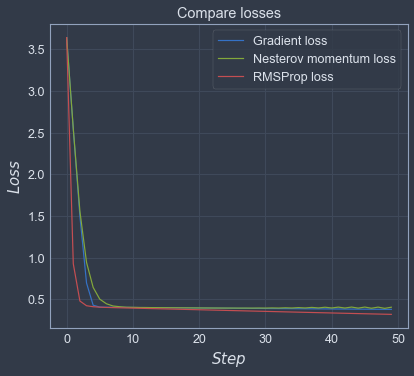

In [181]:
# Сравним скорость убывания ошибки
plt.plot(range(50), grad_loss_hist, label='Gradient loss' )
plt.plot(range(50), nest_loss_hist, label='Nesterov momentum loss' )
plt.plot(range(50), rmsp_loss_hist, label='RMSProp loss' )
plt.title('Compare losses')
plt.xlabel('$Step$', fontsize=15)
plt.ylabel('$Loss$', fontsize=15)
plt.legend()
plt.show()

### RMSProp показал лучший результат и по скорости убывания ошибки, и по конечной ошибки. Нестеров петляет вокруг  минимума.

##### ТО DO: можно переделать на матричные операции общего вида, для любого количества перемнных.